<a href="https://colab.research.google.com/github/Loop3D/2022_iamg_workshop/blob/main/LoopStructural/WORKED-LoopStructural_basic_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [1]:
!pip install git+https://github.com/Loop3d/LoopStructural
!pip install numpy pandas lavavu-osmesa surfepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Loop3d/LoopStructural to /tmp/pip-req-build-5fsddd6g
  Running command git clone -q https://github.com/Loop3d/LoopStructural /tmp/pip-req-build-5fsddd6g
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 57 kB 2.8 MB/s 
     |████████████████████████████████| 438 kB 10.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for LoopStructural: filename=LoopStructural-1.4.10-cp37-cp37m-linux_x86_64.whl size=1145481 sha256=9b984ade457c26b9dc1e99be648b85d8f817baa10139778d39f11b8b66430812
  Stored in directory: /tmp/pip-ephem-wheel-cache-47odncww/wheels/f0/52/f7/debbf81fca78be4c814265abfa2dd29318883cf44e61eebb93
  Created wheel for scikit-fmm: filename=scikit_fmm-2022.8.15-cp37-cp37m-linux_x86_64.whl size=221575 sha256=f97

In [50]:
import numpy as np

extent = np.zeros((3,2))
extent[:,1] = 10

x = np.linspace(0,10,10)
y = np.linspace(0,10,10)

xx,yy = np.meshgrid(x,y)
zz = np.zeros_like(xx)
zz[:] = 1# + np.random.random(zz.shape)
val = np.zeros_like(xx)
val[:] = 0
surface_1 = np.array([xx.flatten(),yy.flatten(),zz.flatten(),val.flatten()]).T
zz[:] = 5 + np.random.random(zz.shape)
val[:] = 1
surface_2 = np.array([xx.flatten(),yy.flatten(),zz.flatten(),val.flatten()]).T

In [ ]:
surface_2

In [8]:
from LoopStructural.visualisation import LavaVuModelViewer

In [12]:
view = LavaVuModelViewer(None)
view.add_points(surface_2[:,:3],'surface_2',pointsize=5)
view.add_points(surface_1[:,:3],'surface_1',pointsize=5,colour='red')
view.interactive()

In [51]:
import pandas as pd
data = pd.DataFrame(surface_1,columns=['X','Y','Z','val'])

In [52]:
data2 = pd.DataFrame(surface_2,columns=['X','Y','Z','val'])
data2

,X,Y,Z,val
0,0.000000,0.0,5.069610,1.0
1,1.111111,0.0,5.639294,1.0
2,2.222222,0.0,5.315566,1.0
3,3.333333,0.0,5.010394,1.0
4,4.444444,0.0,5.757861,1.0
...,...,...,...,...
95,5.555556,10.0,5.446677,1.0
96,6.666667,10.0,5.565321,1.0
97,7.777778,10.0,5.696056,1.0
98,8.888889,10.0,5.272654,1.0


In [53]:
data = pd.concat([data,data2])

In [54]:
data['feature_name']='strati'

In [55]:
data

,X,Y,Z,val,feature_name
0,0.000000,0.0,1.000000,0.0,strati
1,1.111111,0.0,1.000000,0.0,strati
2,2.222222,0.0,1.000000,0.0,strati
3,3.333333,0.0,1.000000,0.0,strati
4,4.444444,0.0,1.000000,0.0,strati
...,...,...,...,...,...
95,5.555556,10.0,5.446677,1.0,strati
96,6.666667,10.0,5.565321,1.0,strati
97,7.777778,10.0,5.696056,1.0,strati
98,8.888889,10.0,5.272654,1.0,strati


In [21]:
from LoopStructural import GeologicalModel

In [23]:
data[['X','Y','Z']].min(),data[['X','Y','Z']].max()

(X    0.000000
 Y    0.000000
 Z    1.005023
 dtype: float64, X    10.00000
 Y    10.00000
 Z     5.98854
 dtype: float64)

In [56]:
model = GeologicalModel(origin=np.array([0,0,0.]),maximum=np.array([10,10,10.]))

In [57]:
print(model)

GeologicalModel - 10.0 x 10.0 x 10.0
------------------------------------------ 
The model contains 0 GeologicalFeatures 
------------------------------------------ 
Model origin: 0.0 0.0 0.0
Model maximum: 10.0 10.0 10.0
Model rescale factor: 1.0 
------------------------------------------ 
Feature list: 



In [58]:
model.data = data

In [66]:
strati = model.create_and_add_foliation('strati',regularisation=0.1)#,interpolatortype='surfe',regression_smoothing=2)

In [37]:
strati.interpolator.nx

35937

In [67]:
model.update()

  0%|          | 0/1 [00:00<?, ?it/s]

In [68]:
view = LavaVuModelViewer(model)
view.add_isosurface(model['strati'],slices=[0,1])
view.add_data(model['strati'])
view.interactive()


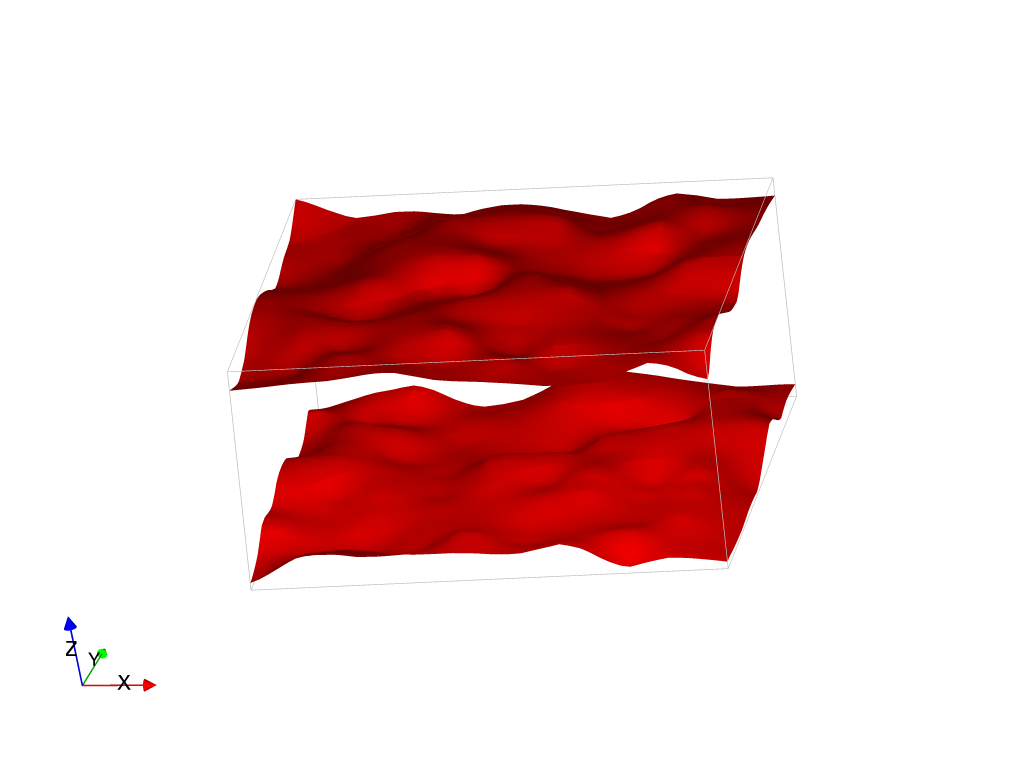

In [42]:
view.display()